# Analysis of Logistic Regression models trained with _all_ features (trad + arg) 
# force (aug)
## id: 06111210

### force = data generated using the prompt force_TSBS which forces the model to choose one answer 

+ on 10545 instances
+ on same splits as for the transformers models (coqa_force_aug)

In [1]:
import os
import json
import pandas as pd
import pprint as pp

In [2]:
PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
STATS_DIR = os.path.join(PROJECT_DIR, "classification/stats/")

PROJECT_DIR

'/mount/studenten-temp1/users/dpgo/xai-thesis'

In [3]:
run_file_map = {
    'col-rfe_force': '06111210_col-rfe_all_new.json',
    'col-rfe_force_noerrors': '06111210_col-rfe_all_no-errors_new.json'
}

In [43]:
def visualize_results(stats_file, n_features=10):
    
    # load file with results
    with open(os.path.join(PROJECT_DIR, stats_file), "r") as f:
        stats = json.load(f)
        coef_dict, scores_dict = stats['coefficients'], stats['scores']

    # metrics
    # round floats in scores_dict to 2 decimals
    for key, value in scores_dict.items():
        if isinstance(value, float):
            scores_dict[key] = round(value, 2)
        elif isinstance(value, dict):
            for inner_key, inner_value in value.items():
                if isinstance(inner_value, float):
                    scores_dict[key][inner_key] = round(inner_value, 2)
                if inner_key == 'support':
                    scores_dict[key][inner_key] = int(inner_value)
    
    #pp.pprint(scores_dict, indent=4)
    
    # feature importances
    coef_df = pd.DataFrame(coef_dict.items(), columns=['feature', 'coefficient'])
    coef_df = coef_df.sort_values(by='coefficient', ascending=False)

    top_n_pos_features = coef_df.head(n_features)
    top_n_neg_features = coef_df.tail(n_features)
    top_features_df = pd.merge(top_n_pos_features, top_n_neg_features, how='outer')

    #top_features_df.plot(x='feature', y='coefficient', kind='barh', figsize=(20, 10))
    top_features_df.plot(
        x='feature', 
        y='coefficient', 
        kind='barh', 
        figsize=(20, 10), 
        color=(top_features_df['coefficient'] > 0).map(
            {True: 'tab:orange', False: 'tab:blue'})
        ).legend(
            loc = 'upper right'
        )
    
    #x.plot(kind="bar").legend(*args, **kwargs)

    return top_features_df

## No collinear features + Recursive Feature Elimination (RFE)

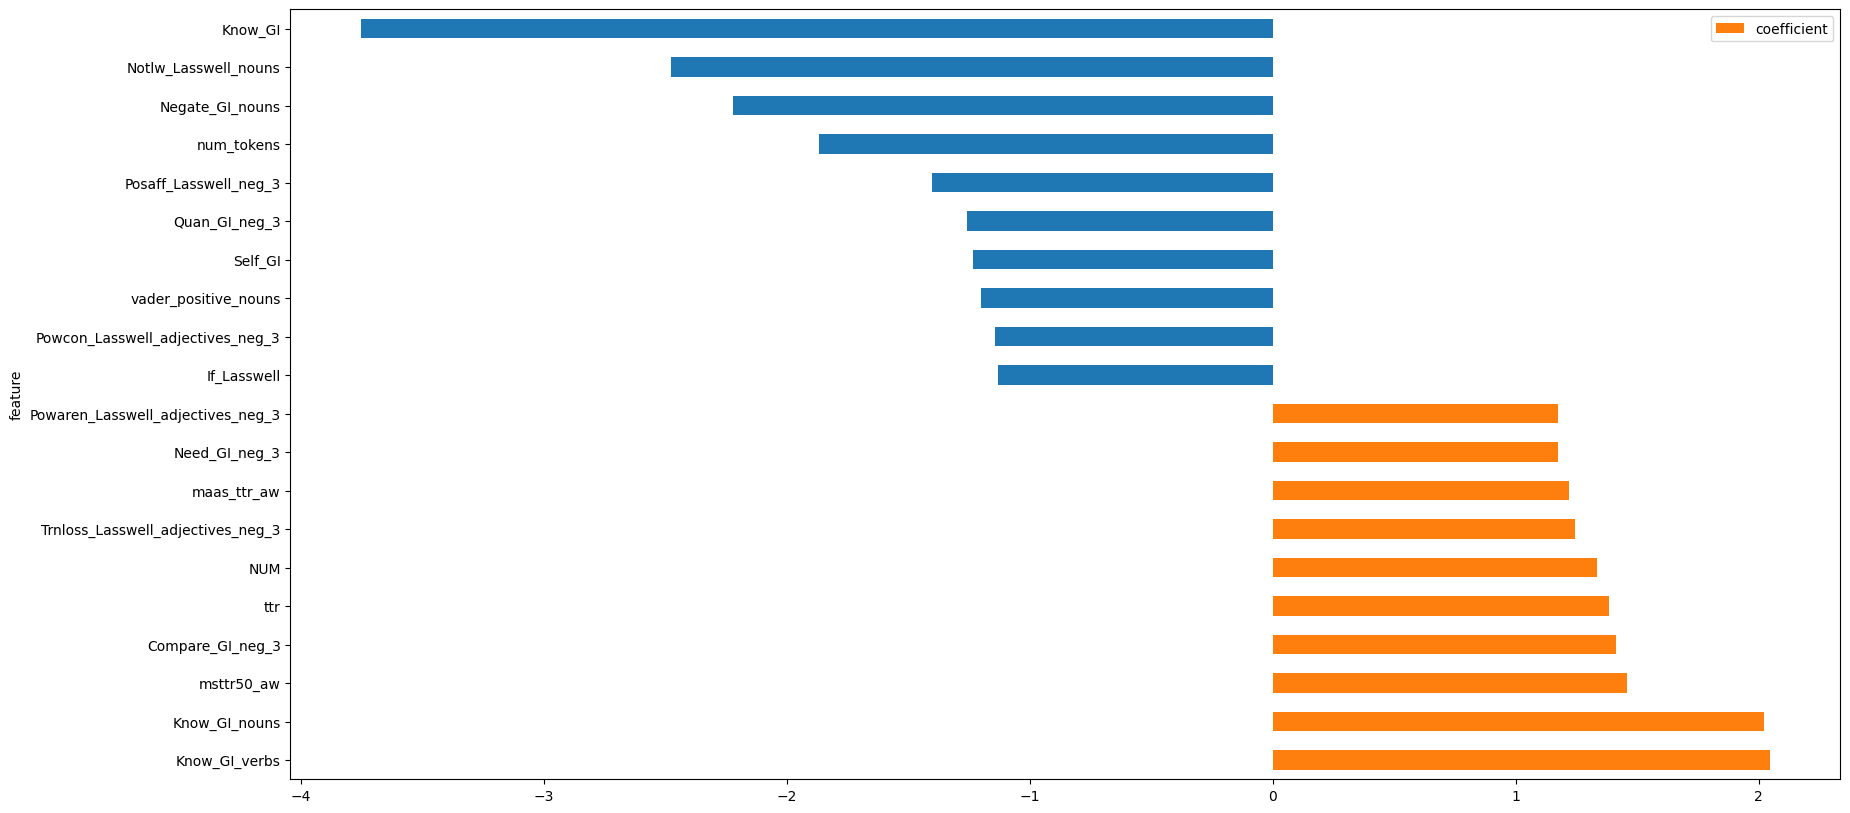

In [44]:
top_force = visualize_results(os.path.join(STATS_DIR, run_file_map['col-rfe_force']))

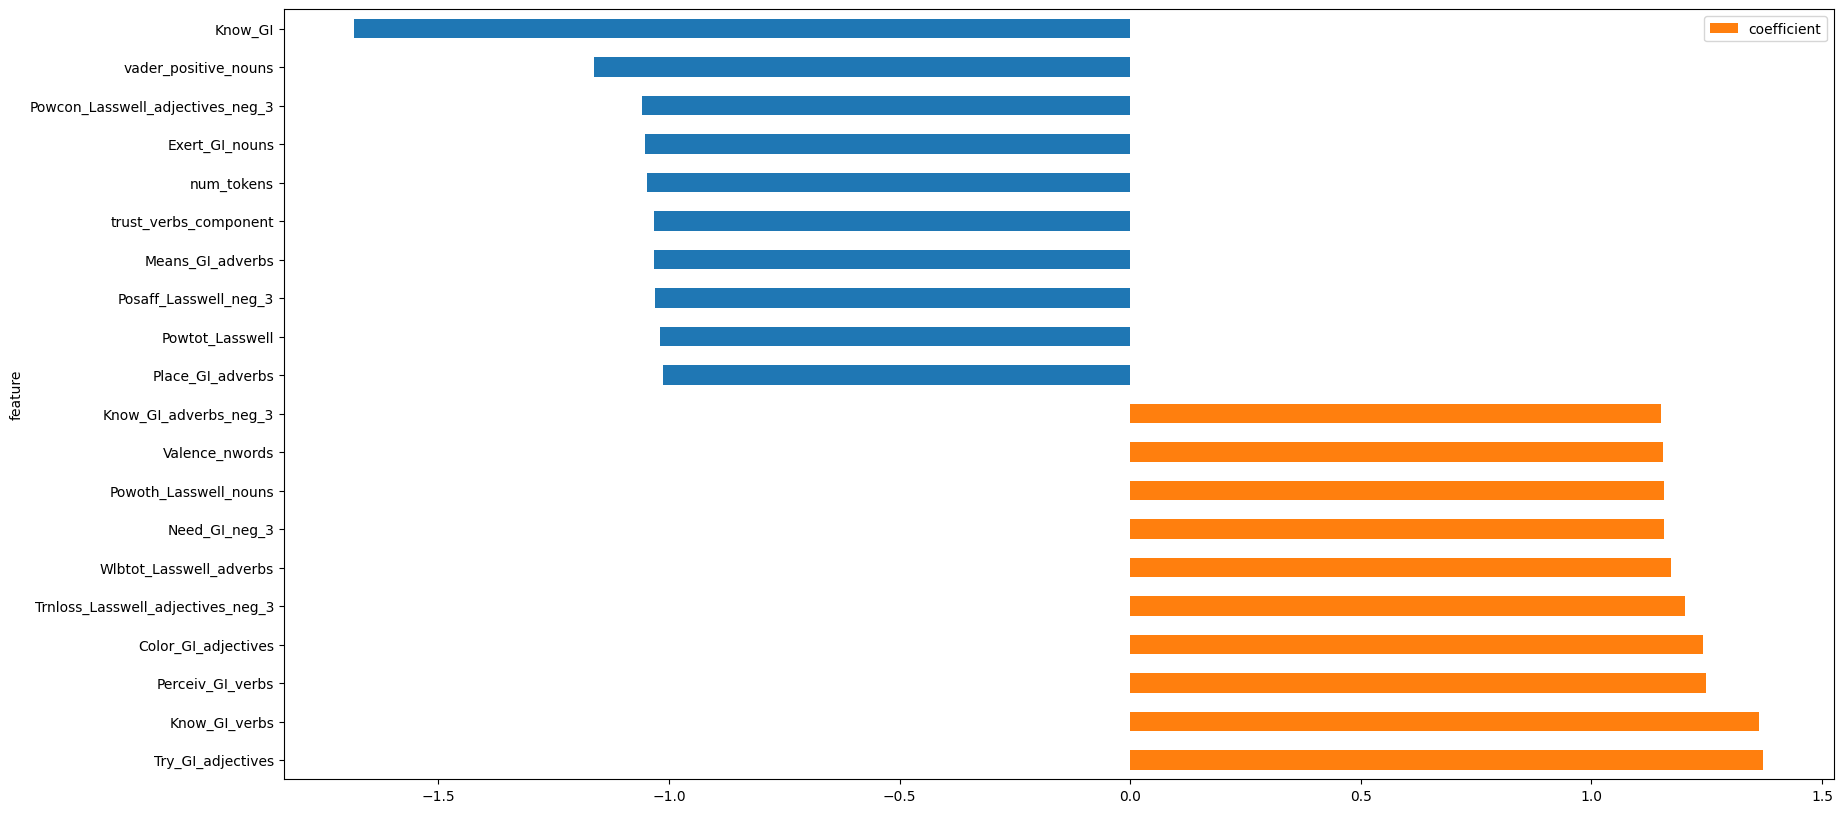

In [46]:
top_force_noerrors = visualize_results(os.path.join(STATS_DIR, run_file_map['col-rfe_force_noerrors']))